# **Stability Analysis**

## **Example 1: One Steady State**

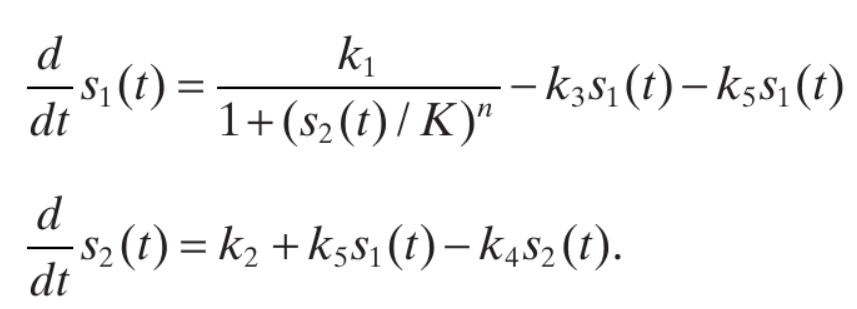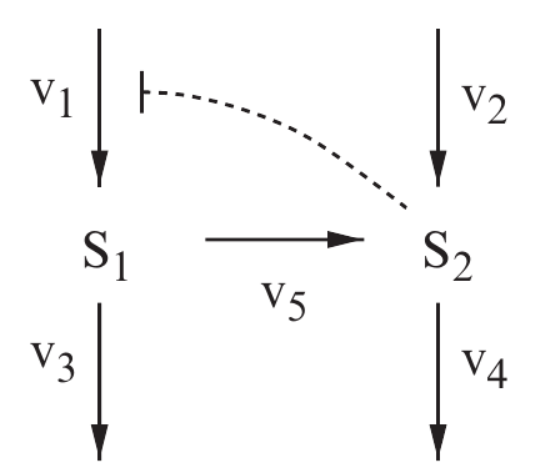

**Let's first see the Michales Menten behavior of the two substrates.**

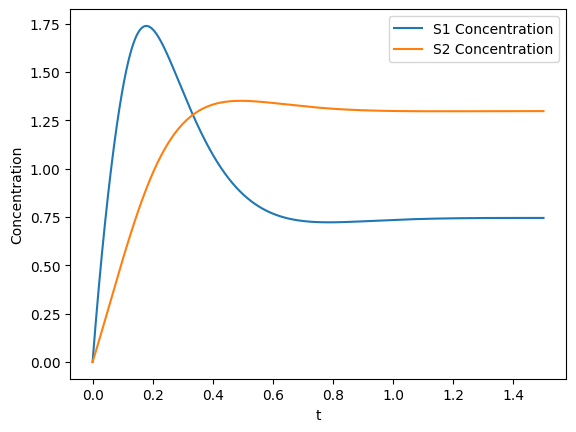

In [143]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def michaelis_menton(S,t,k1,k2,k3,k4,k5,K,n):
    s1=S[0]
    s2=S[1]
    ds1_dt=-s1*(k3+k5)+k1/(1+(s2/K)**n)
    ds2_dt=(k2+k5*s1)-k4*s2
    return [ds1_dt,ds2_dt]

n=4
k1=20
k2=5
k3=5
k4=5
k5=2
K=1
t=np.linspace(0,1.5,10000)
x0=[0, 0]
dynamics=odeint(michaelis_menton,x0,t,args=(k1,k2,k3,k4,k5,K,n))
plt.plot(t,dynamics[:,0],label='S1 Concentration')
plt.plot(t,dynamics[:,1],label='S2 Concentration')
plt.xlabel("t")
plt.ylabel("Concentration")
plt.legend()
plt.show()

As evident, S1 decreases with time when S2 increases and can inhibit it.

**Let's now plot the nullclines.**

The nullclines are:

$s_1=\frac{k_1}{(k_3+k_5)(1+(\frac{s_2}{K})^{n})}$


$s_2=\frac{k_2+k_5*s_1}{k4}$

In [144]:
def plot_nullclines(k1,k2,k3,k4,k5,K,n):
    s1_array=np.linspace(0,2,1000)
    s2_array=np.linspace(0,2,1000)
    s1=k1/((k3+k5)*(1+(s2_array/K)**n))
    s2=(k2+k5*s1_array)/k4
    plt.plot(s1,s1_array,label='S1 Nullcline')
    plt.plot(s2_array,s2,label='S2 Nullcline')
    plt.xlabel("Concentration of S1")
    plt.ylabel("Concentration of S2")
    plt.xlim([0,2])
    plt.legend()

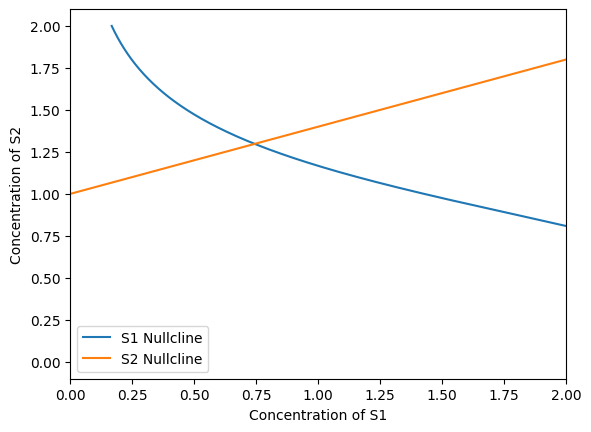

In [145]:
plot_nullclines(k1, k2, k3, k4, k5, K, n)

**Now let's plot the vector field, which should look something like the figure below.**

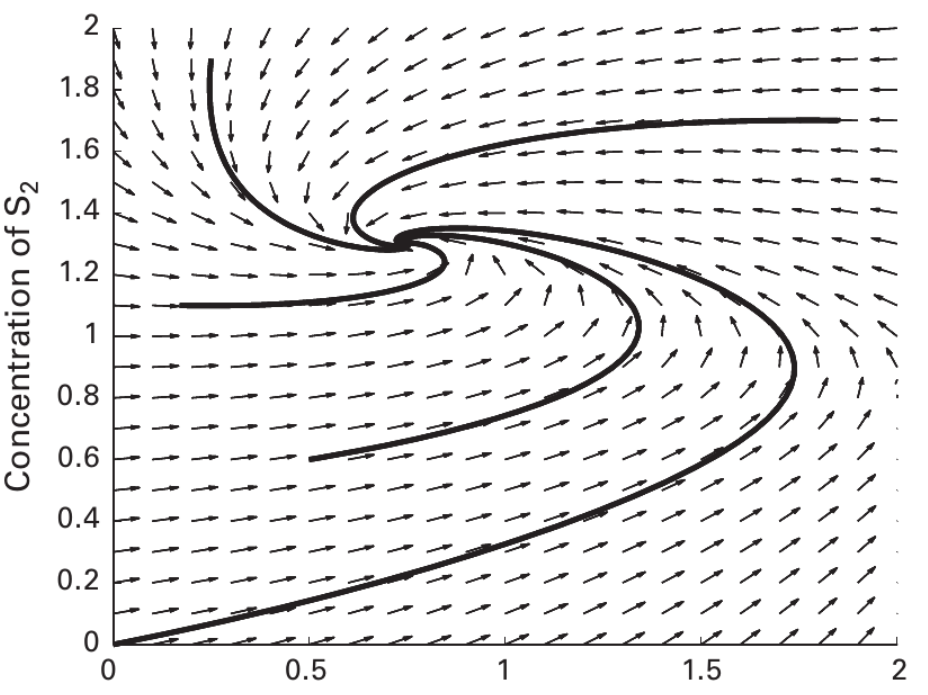

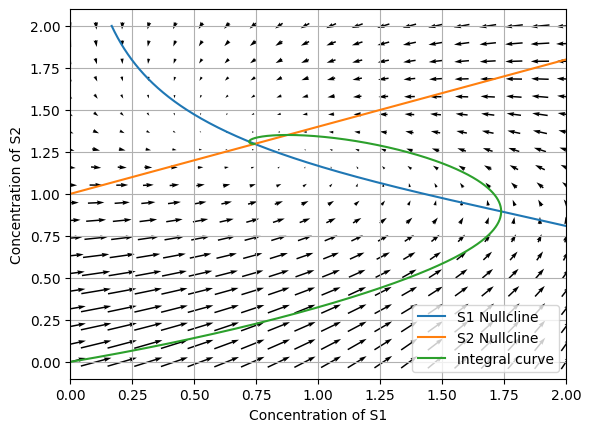

In [146]:
def plot_phase_plane(k1,k2,k3,k4,k5,K,n):
    x = np.linspace(0, 2, 20)
    y = np.linspace(0, 2, 20)
    X1 , Y1  = np.meshgrid(x, y)
    t=1
    DX1, DY1 = michaelis_menton([X1, Y1],t,k1,k2,k3,k4,k5,K,n)# compute derivatives on the grid
    plt.quiver(X1, Y1, DX1, DY1, pivot='mid')
    plt.grid()

def integrate(k1,k2,k3,k4,k5,K,n):
    t=np.linspace(0,1.5,10000)
    x0=[0, 0]
    dynamics=odeint(michaelis_menton,x0,t,args=(k1,k2,k3,k4,k5,K,n))
    plt.plot(dynamics[:,0],dynamics[:,1],label='integral curve')
    plt.xlabel("Concentration of S1")
    plt.ylabel("Concentration of S2")
    plt.legend()

plot_phase_plane(k1,k2,k3,k4,k5,K,n)
plot_nullclines(k1,k2,k3,k4,k5,K,n)
integrate(k1,k2,k3,k4,k5,K,n)

**We should normalize the vectors!**
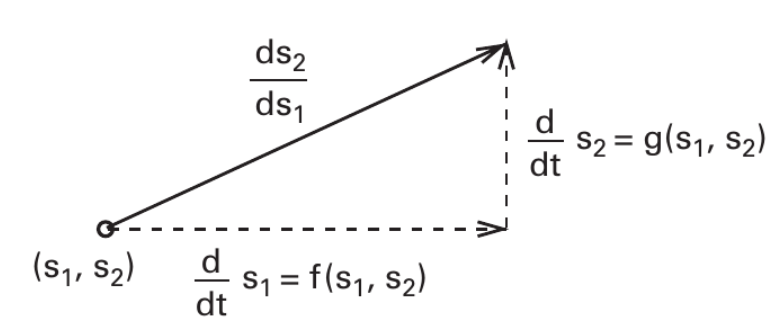

In [147]:
def normalize(DX1,DY1):
    M = (np.hypot(DX1, DY1))
    M[ M == 0] = 1 # avoids zero division
    DX1 /= M
    DY1 /= M
    return DX1,DY1

Now let's re-run the same code but with the magnitudes normalized.

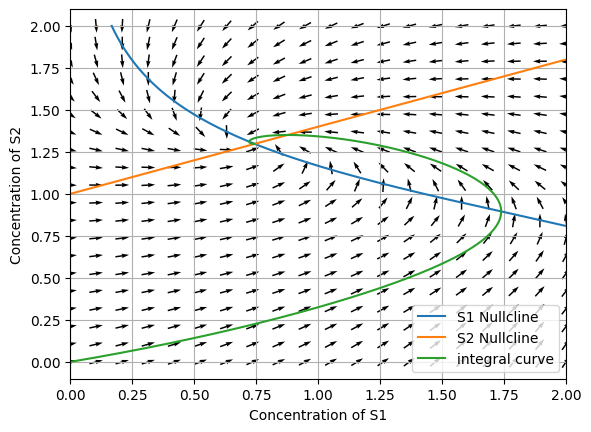

In [148]:
def plot_phase_plane_normalized(k1,k2,k3,k4,k5,K,n):
    x = np.linspace(0, 2, 20)
    y = np.linspace(0, 2, 20)
    X1 , Y1  = np.meshgrid(x, y)
    t=1
    DX1, DY1 = michaelis_menton([X1, Y1],t,k1,k2,k3,k4,k5,K,n)# compute derivatives on the grid
    ## Notice the line below
    DX1,DY1=normalize(DX1,DY1) # notice this new line
    ## Notice the line above
    plt.quiver(X1, Y1, DX1, DY1, pivot='mid')
    plt.grid()

plot_phase_plane_normalized(k1,k2,k3,k4,k5,K,n)
plot_nullclines(k1,k2,k3,k4,k5,K,n)
integrate(k1,k2,k3,k4,k5,K,n)

**Exercise 1: Use opt.fsolve to calculate the equilibrium point (steady state) of the system. fsolve takes (func, x0, args=())**

**Exercise 2: Get the intersection of the two nullclines to calculate the equilibirium point (steady state) of the system. Compare your answer with that found in Exercise 1.**

## **Example 2: Two Steady States**

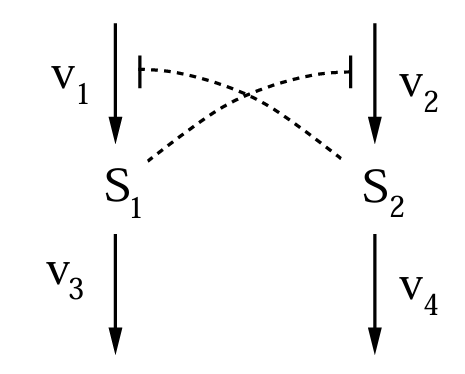

**Let's re-do the same exact analysis**

In [173]:
def michaelis_menton(S, t, k1, k2, k3, k4, K1, K2, n1, n2):
    s1 = S[0]
    s2 = S[1]

    # Define the differential equations
    ds1_dt = (k1 / (1 + (s2 / K2)**n1)) - k3 * s1
    ds2_dt = (k2 / (1 + (s1 / K1)**n2)) - k4 * s2

    return [ds1_dt, ds2_dt]


def plot_nullclines(k1, k2, k3, k4, K1, K2, n1, n2):

    s1_array = np.linspace(0, 5, 1000)
    s2_array = np.linspace(0, 5, 1000)

    s1_nullcline = k1 / (k3 * (1 + (s2_array / K2)**n1))
    s2_nullcline = k2 / (k4 * (1 + (s1_array / K1)**n2))

    plt.plot(s1_nullcline, s1_array, label="S1 Nullcline", color="blue", linestyle='solid')
    plt.plot(s2_array, s2_nullcline, label="S2 Nullcline", color="red", linestyle='dashed')

    plt.xlabel("Concentration of S1")
    plt.ylabel("Concentration of S2")
    plt.xlim([0, 5])
    plt.legend()

def plot_phase_plane_normalized(k1, k2, k3, k4, K1, K2, n1, n2):
    x = np.linspace(0, 5, 20)
    y = np.linspace(0, 5, 20)
    X1, Y1 = np.meshgrid(x, y)

    DX1, DY1 = michaelis_menton([X1, Y1], 1, k1, k2, k3, k4, K1, K2, n1, n2)

    DX1, DY1 = normalize(DX1, DY1)

    plt.quiver(X1, Y1, DX1, DY1, pivot='mid')
    plt.xlabel("Concentration of S1")
    plt.ylabel("Concentration of S2")
    plt.grid(True)

def integrate(k1, k2, k3, k4, K1, K2, n1, n2, x01, x02):
    t = np.linspace(0, 5, 1000)
    x0 = [x01, x02]

    dynamics = odeint(michaelis_menton, x0, t, args=(k1, k2, k3, k4, K1, K2, n1, n2))

    plt.plot(dynamics[:, 0], dynamics[:, 1], label="Integral Curve")
    plt.xlabel("Concentration of S1")
    plt.ylabel("Concentration of S2")
    plt.legend()

k1 = k2 = 20
K1 = K2 = 1
k3 = k4 = 5
n1 = 4
n2 = 1

In [167]:
def plotMM(k1, k2, k3, k4, K1, K2, n1, n2, x01, x02):
    t = np.linspace(0, 4, 1000)
    x0 = [x01, x02] # initial conditions

    dynamics = odeint(michaelis_menton, x0, t, args=(k1, k2, k3, k4, K1, K2, n1, n2))

    plt.plot(t, dynamics[:, 0], label='S1 Concentration')
    plt.plot(t, dynamics[:, 1], label='S2 Concentration')
    plt.xlabel("Time (t)")
    plt.ylabel("Concentration")
    plt.legend()
    plt.title("Concentration of S1 and S2 Over Time")
    plt.grid(True)

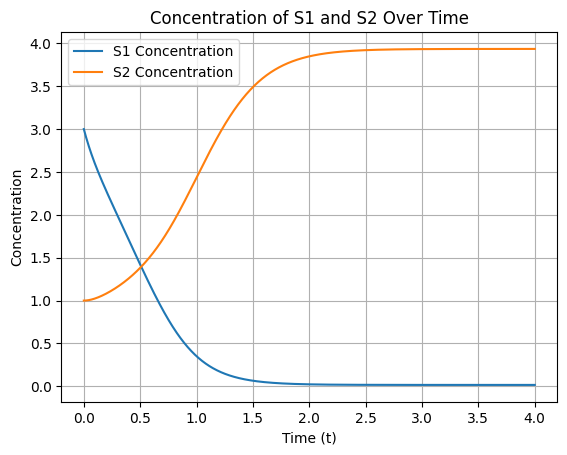

In [168]:
plotMM(k1, k2, k3, k4, K1, K2, n1, n2, 3, 1)

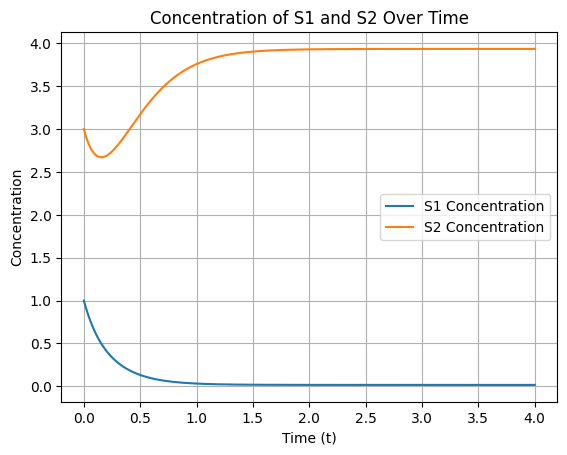

In [169]:
# If we flip the initial conditions to start with more S2 (1, 3)
plotMM(k1, k2, k3, k4, K1, K2, n1, n2, 1, 3)

# We reach the same conclusion: S2 dominates over time since n2 > n1.

**Now let's see the phase portrait and nullclines.**

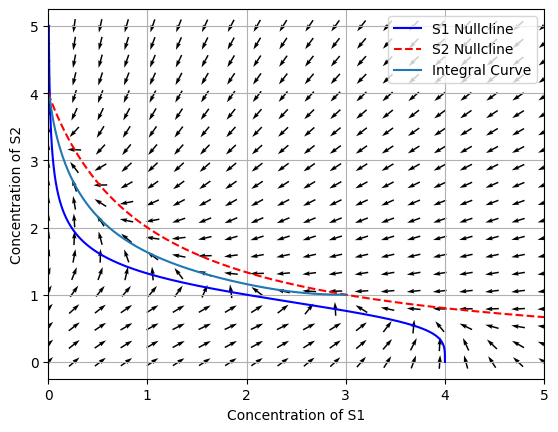

In [174]:
plot_phase_plane_normalized(k1,k2,k3,k4,K1, K2,n1, n2)
plot_nullclines(k1,k2,k3,k4,K1, K2, n1, n2)
integrate(k1,k2,k3,k4,K1,K2, n1, n2, 3, 1)

**Now let's do everything but make n1 = n2!!**

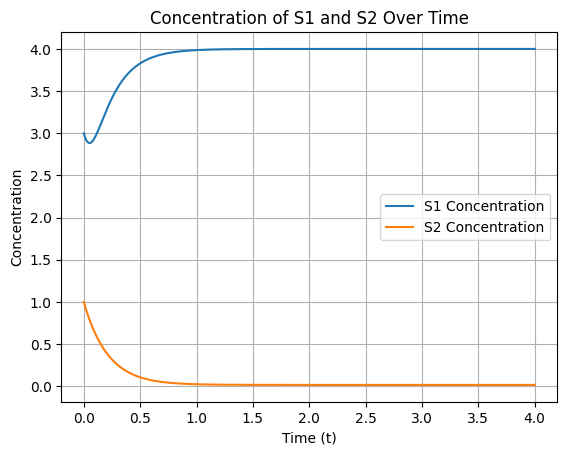

In [175]:
n1 = n2 = 4
plotMM(k1, k2, k3, k4, K1, K2, n1, n2, 3, 1) # start with more S1
# S1 keeps dominating!!

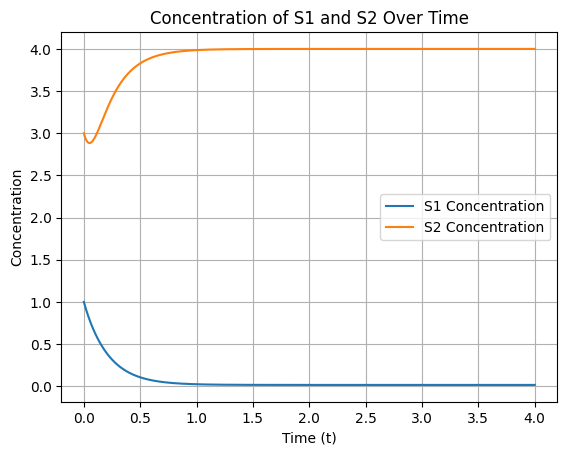

In [164]:
plotMM(k1, k2, k3, k4, K1, K2, n1, n2, 1, 3) # start with more S2
# S2 keeps dominating!!

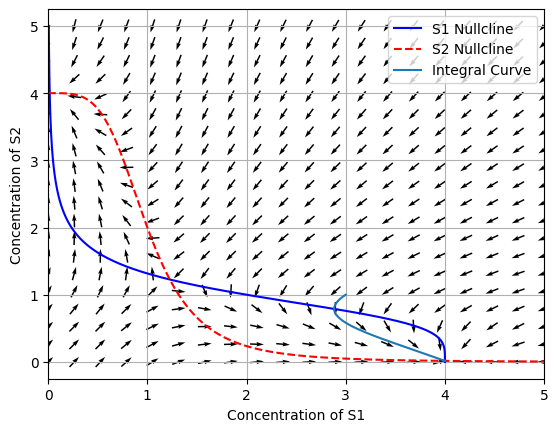

In [176]:
plot_phase_plane_normalized(k1,k2,k3,k4,K1, K2,n1, n2)
plot_nullclines(k1,k2,k3,k4,K1, K2, n1, n2)
integrate(k1,k2,k3,k4,K1,K2, n1, n2, 3, 1) # goes to whichever closed steady state

## **Computing Jacobian, eigenvalues, and drawing stability heatmap with SymPy**

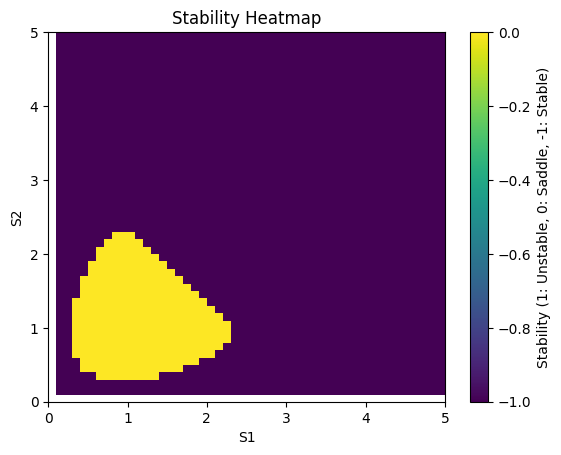

In [157]:
import sympy as sp

# Define symbolic variables and parameters
S1, S2 = sp.symbols('S1 S2')
k1, k2, k3, k4, n1, n2, K1, K2 = sp.symbols('k1 k2 k3 k4 n1 n2 K1 K2')

# Define the system of equations
dS1_dt = (k1 / (1 + (S2 / K2)**n1)) - k3 * S1
dS2_dt = (k2 / (1 + (S1 / K1)**n2)) - k4 * S2

# Compute the Jacobian matrix
system = sp.Matrix([dS1_dt, dS2_dt])
jacobian_matrix = system.jacobian([S1, S2])

# Define ranges for S1 and S2
s1_rng = np.linspace(0.0, 5.0, 50)
s2_rng = np.linspace(0.0, 5.0, 50)

# Define arrays to store eigenvalues and stability
e_s1s2_r1 = np.zeros((len(s1_rng), len(s2_rng)))
e_s1s2_r2 = np.zeros((len(s1_rng), len(s2_rng)))
stability = np.zeros((len(s1_rng), len(s2_rng)))

# Store the parameter values
params = {k1: 20, k2: 20, k3: 5, k4: 5, n1: 4, n2: 4, K1: 1, K2: 1}

# Loop through S1 and S2 values
for s1i, s1_val in enumerate(s1_rng):
    for s2i, s2_val in enumerate(s2_rng):
        try:
            # Substitute values into the Jacobian matrix
            J_evaluated = jacobian_matrix.subs({S1: s1_val, S2: s2_val, **params})

            # Convert the evaluated Jacobian to a NumPy array
            J_numeric = np.array(J_evaluated.tolist(), dtype=float)

            # Compute eigenvalues using NumPy
            # Calculating eigenvalues with sympy produces some error so I did it with np.linalg.eigvals instead.
            eigenvalues = np.linalg.eigvals(J_numeric)
            tmp_e_r1, tmp_e_r2 = eigenvalues # Store the calculated eigenvalues in two temp variables.

            # Store eigenvalues in the arrays.
            e_s1s2_r1[s1i, s2i] = tmp_e_r1
            e_s1s2_r2[s1i, s2i] = tmp_e_r2

            # Determine stability
            if tmp_e_r1 > 0 and tmp_e_r2 > 0:
                stability[s1i, s2i] = 1  # Unstable
            elif tmp_e_r1 < 0 and tmp_e_r2 < 0:
                stability[s1i, s2i] = -1  # Stable
            else:
                stability[s1i, s2i] = 0  # Saddle point
        except Exception as e:
            stability[s1i, s2i] = np.nan
            continue

plt.imshow(
    stability[::-1, :],
    extent=[s1_rng.min(), s1_rng.max(), s2_rng.min(), s2_rng.max()],
    aspect='auto',
)
plt.colorbar(label="Stability (1: Unstable, 0: Saddle, -1: Stable)")
plt.xlabel("S1")
plt.ylabel("S2")
plt.title("Stability Heatmap")
plt.show()

## **Computing Jacobian, eigenvalues, and drawing stability heatmap manually**

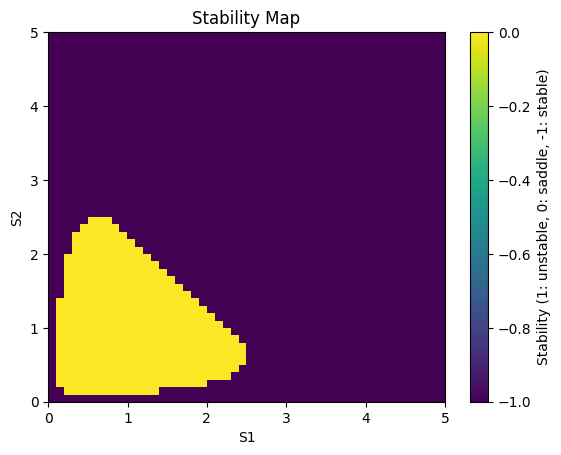

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def jref(s1, s2):
    return np.array([
        [-5, (-20 * 2 * s2) / ((1 + s2**2)**2)],
        [(-20 * 2 * s1) / ((1 + s1**2)**2), -5]
    ])

s1_rng = np.linspace(0.0, 5.0, 50)
s2_rng = np.linspace(0.0, 5.0, 50)

e_s1s2_r1 = np.zeros((s1_rng.size, s2_rng.size))
e_s1s2_r2 = np.zeros((s1_rng.size, s2_rng.size))
e_s1s2 = np.zeros((s1_rng.size, s2_rng.size))

for s1i, s1 in enumerate(s1_rng):
    for s2i, s2 in enumerate(s2_rng):
        tmp_J = jref(s1, s2)
        try:
            eigenvalues = np.linalg.eigvals(tmp_J)
            tmp_e_r1, tmp_e_r2 = eigenvalues
            e_s1s2_r1[s1i, s2i] = tmp_e_r1
            e_s1s2_r2[s1i, s2i] = tmp_e_r2


            if tmp_e_r1 > 0 and tmp_e_r2 > 0:
                e_s1s2[s1i, s2i] = 1
            elif tmp_e_r1 < 0 and tmp_e_r2 < 0:
                e_s1s2[s1i, s2i] = -1
            else:
                e_s1s2[s1i, s2i] = 0
        except Exception as e:
            continue

plt.imshow(e_s1s2[::-1, :], extent=[s1_rng.min(), s1_rng.max(), s2_rng.min(), s2_rng.max()], aspect='auto')
plt.colorbar(label="Stability (1: unstable, 0: saddle, -1: stable)")
plt.xlabel("S1")
plt.ylabel("S2")
plt.title("Stability Map")
plt.show()